In [1]:
import os, shutil

In [8]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
DOWNLOAD_DIR = '/Users/rajaraju/Downloads/Birds/'
BASE_DIR = '/Users/rajaraju/Downloads/birds_classes'

def data_directory(class_labels):
    """ 
        Creates the folder structure for Training, Validation and Test data and Class Labels.
        
        Parameters:
        class_labels : Names of the classes, for example: cats, dogs, horses.   
    """ 
    dataset_folders = ['train','validation','test']
    object_class = class_labels
    os.mkdir(BASE_DIR)
    
    for folder in dataset_folders:
        for obj_cls in object_class:
            training_dir = BASE_DIR + os.sep +'{}'.format(folder)
            if not os.path.exists(BASE_DIR + os.sep +'{}'.format(folder)):
                os.mkdir(training_dir)
            class_dir = training_dir + os.sep + '{}'.format(obj_cls)
            if not os.path.exists(training_dir + os.sep + '{}'.format(obj_cls)):
                os.mkdir(class_dir)
                
data_directory(['cuckoo','sparrow'])

In [7]:
filenames = ['cuckoo{}.jpg'.format(i) for i in range(1,16)]
for i,filename in enumerate(filenames):
    src = os.path.join(DOWNLOAD_DIR + 'cuckoo', 'pic{}.jpg'.format(i+1))
    dst = os.path.join(BASE_DIR + os.sep + 'train' + os.sep + 'cuckoo', filename)
    shutil.copyfile(src,dst)
    
filenames = ['cuckoo{}.jpg'.format(i) for i in range(16,21)]
for i,filename in enumerate(filenames):
    src = os.path.join(DOWNLOAD_DIR + 'cuckoo', 'pic{}.jpg'.format(i+16))
    dst = os.path.join(BASE_DIR + os.sep + 'test' + os.sep + 'cuckoo', filename)
    shutil.copyfile(src,dst)
    
filenames = ['sparrow{}.jpg'.format(i) for i in range(1,16)]
for i,filename in enumerate(filenames):
    src = os.path.join(DOWNLOAD_DIR + 'sparrow', 'pic{}.jpg'.format(i+1))
    dst = os.path.join(BASE_DIR + os.sep + 'train' + os.sep + 'sparrow', filename)
    shutil.copyfile(src,dst)
    
filenames = ['sparrow{}.jpg'.format(i) for i in range(16,21)]
for i,filename in enumerate(filenames):
    src = os.path.join(DOWNLOAD_DIR + 'sparrow', 'pic{}.jpg'.format(i+16))
    dst = os.path.join(BASE_DIR + os.sep + 'test' + os.sep + 'sparrow', filename)
    shutil.copyfile(src,dst)

In [10]:
train_dir = os.path.join(BASE_DIR,'train')
test_dir = os.path.join(BASE_DIR,'test')

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
train_data = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
                    train_dir, target_size=(150,150),
                    batch_size=5,
                    class_mode='binary')

test_generator = test_data.flow_from_directory(
                    test_dir, target_size=(150,150),
                    batch_size=5,
                    class_mode='binary')

history = model.fit_generator(
            train_generator,
            steps_per_epoch=3,
            epochs=100,
            validation_data=test_generator,
            nb_val_samples=5)

Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


/Users/rajaraju/.virtualenvs/DeepLearning/lib/python3.5/site-packages/ipykernel_launcher.py:27: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/Users/rajaraju/.virtualenvs/DeepLearning/lib/python3.5/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=3, validation_steps=5, epochs=100)`


Epoch 1/100
3/3 [==============================] - 3s - loss: 0.7339 - acc: 0.5333 - val_loss: 0.6802 - val_acc: 0.5200
Epoch 2/100
3/3 [==============================] - 2s - loss: 0.6929 - acc: 0.4000 - val_loss: 0.6630 - val_acc: 0.5600
Epoch 3/100
3/3 [==============================] - 2s - loss: 0.6679 - acc: 0.6000 - val_loss: 0.6651 - val_acc: 0.5200
Epoch 4/100
3/3 [==============================] - 2s - loss: 0.6919 - acc: 0.4000 - val_loss: 0.6697 - val_acc: 0.4400
Epoch 5/100
3/3 [==============================] - 2s - loss: 0.6547 - acc: 0.4667 - val_loss: 0.6493 - val_acc: 0.4800
Epoch 6/100
3/3 [==============================] - 2s - loss: 0.6652 - acc: 0.5333 - val_loss: 0.6944 - val_acc: 0.4000
Epoch 7/100
3/3 [==============================] - 2s - loss: 0.6257 - acc: 0.6000 - val_loss: 0.6307 - val_acc: 0.5200
Epoch 8/100
3/3 [==============================] - 2s - loss: 0.6802 - acc: 0.4667 - val_loss: 0.6250 - val_acc: 0.8800
Epoch 9/100
3/3 [=======================

3/3 [==============================] - 2s - loss: 0.3516 - acc: 0.9333 - val_loss: 0.6128 - val_acc: 0.8800
Epoch 69/100
3/3 [==============================] - 2s - loss: 0.2719 - acc: 0.8667 - val_loss: 0.4300 - val_acc: 0.9200
Epoch 70/100
3/3 [==============================] - 2s - loss: 0.3397 - acc: 0.8667 - val_loss: 0.2562 - val_acc: 0.9200
Epoch 71/100
3/3 [==============================] - 2s - loss: 0.2784 - acc: 0.9333 - val_loss: 0.4783 - val_acc: 0.9200
Epoch 72/100
3/3 [==============================] - 2s - loss: 0.1918 - acc: 0.9333 - val_loss: 0.3891 - val_acc: 0.8800
Epoch 73/100
3/3 [==============================] - 2s - loss: 0.4860 - acc: 0.7333 - val_loss: 0.3039 - val_acc: 0.9200
Epoch 74/100
3/3 [==============================] - 2s - loss: 0.2380 - acc: 0.8667 - val_loss: 0.9078 - val_acc: 0.8000
Epoch 75/100
3/3 [==============================] - 2s - loss: 0.5066 - acc: 0.8000 - val_loss: 0.8375 - val_acc: 0.7200
Epoch 76/100
3/3 [===========================

In [16]:
model.save('cuckoo_and_sparrow_small_2.h5')

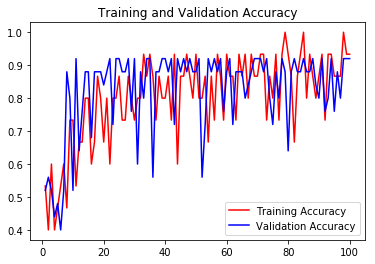

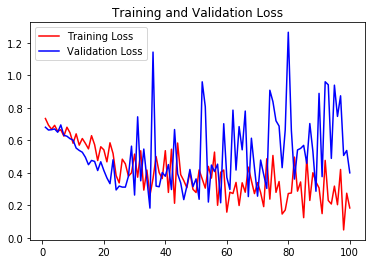

In [18]:
acc =history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

With data augmentation technique and Dropout, the test accuracy has increased from 64% to 92%.